# TP1: Implémentation de la Logique Floue avec Scikit-fuzzy

hamza nachid

iid3

## Introduction

Scikit-fuzzy est une bibliothèque Python dédiée à la logique floue, implémentant des outils pour créer, gérer et manipuler des systèmes flous. Elle est particulièrement utile pour les applications nécessitant une prise de décision dans des environnements incertains, comme les systèmes de contrôle, l'optimisation et l'analyse de données.

## Objectifs

 - Se familiariser avec la bibliothèque scikit-fuzzy pour créer des systèmes de logique floue
 - Implémenter des fonctions d'appartenance, des règles floues et des moteurs d'inférence
 - Utiliser la logique floue pour résoudre des problèmes concrets



## Matériel requis

 - Python installé sur votre machine
 - Bibliothèques requises : scikit-fuzzy, numpy, matplotlib
 - Environnement de développement : Jupyter Notebook ou tout autre IDE compatible avec Python

## Partie 1 : Introduction théorique et installation

### Installez les bibliothèques requises avec pip :
pip install sickit-fuzzy

### Testez l'installation en important les bibliothèques :

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

### Créez une variable floue "Température" avec les états linguistiques "Froid", "Moyen" et "Chaud" :

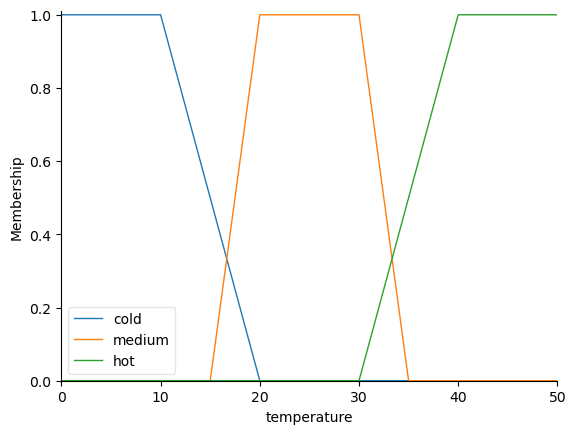

In [8]:
# Create universe of discourse
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')

# Define membership functions
temperature['cold'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['medium'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['hot'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Visualize membership functions
temperature.view()

## Partie 2 : Système flou pour le contrôle de température

Création d'un système flou qui ajuste la puissance d'un chauffage en fonction de la température ambiante :

Puissance du chauffage : 50.00000000000001%


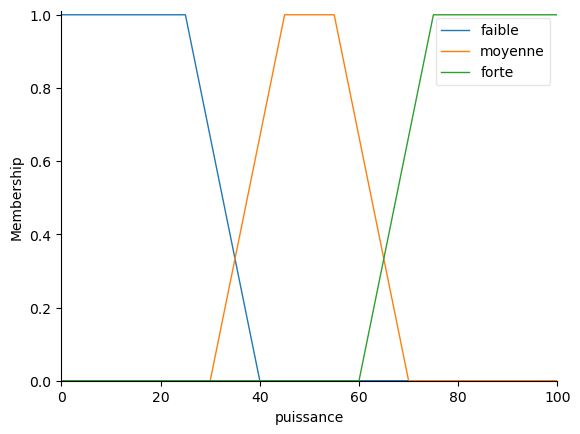

In [16]:
# Création des variables d'entrée et de sortie
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
puissance = ctrl.Consequent(np.arange(0, 101, 1), 'puissance')

# Définition des fonctions d'appartenance pour la température
temperature['froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Définition des fonctions d'appartenance pour la puissance
puissance['faible'] = fuzz.trapmf(puissance.universe, [0, 0, 25, 40])
puissance['moyenne'] = fuzz.trapmf(puissance.universe, [30, 45, 55, 70])
puissance['forte'] = fuzz.trapmf(puissance.universe, [60, 75, 100, 100])

# Définition des règles
regle1 = ctrl.Rule(temperature['froid'], puissance['forte'])
regle2 = ctrl.Rule(temperature['moyen'], puissance['moyenne'])
regle3 = ctrl.Rule(temperature['chaud'], puissance['faible'])

# Création du système de contrôle
chauffage_ctrl = ctrl.ControlSystem([regle1, regle2, regle3])
chauffage = ctrl.ControlSystemSimulation(chauffage_ctrl)

# Test du système
chauffage.input['temperature'] = 25
chauffage.compute()
print(f"Puissance du chauffage : {chauffage.output['puissance']}%")
puissance.view()

## Partie 3 : Utilisation avancée - Système de contrôle de vitesse d'un véhicule

1. Création des variables d'entrée et de sortie

In [79]:
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'visibilite')
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse')


 2. Définition des fonctions d'appartenance pour chaque variable 

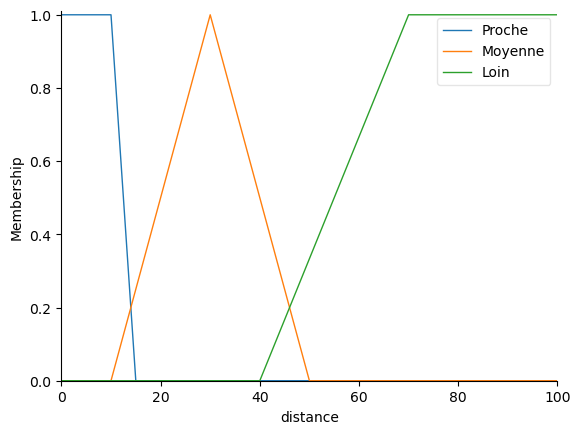

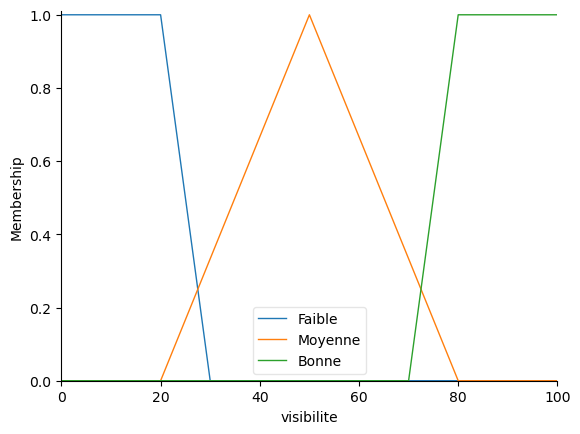

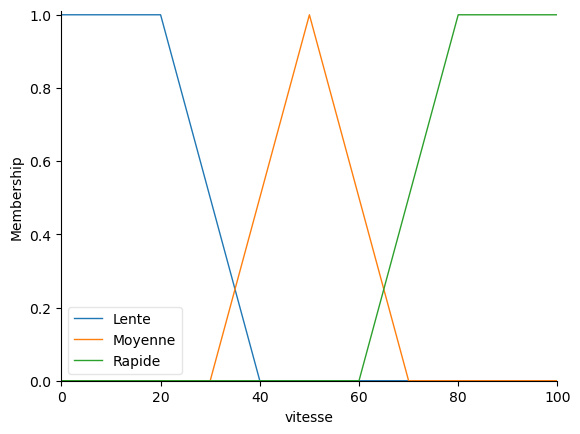

In [81]:
distance['Proche'] = fuzz.trapmf(distance.universe, [0, 0, 10, 15])
distance['Moyenne'] = fuzz.trimf(distance.universe, [10, 30, 50])
distance['Loin'] = fuzz.trapmf(distance.universe, [40, 70, 100, 100])

visibilite['Faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 20, 30])
visibilite['Moyenne'] = fuzz.trimf(visibilite.universe, [20, 50, 80])
visibilite['Bonne'] = fuzz.trapmf(visibilite.universe, [70, 80, 100, 100])

# Fonctions d'appartenance pour la vitesse
vitesse['Lente'] = fuzz.trapmf(vitesse.universe, [0, 0, 20, 40])
vitesse['Moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['Rapide'] = fuzz.trapmf(vitesse.universe, [60, 80, 100, 100])

# Visualiser les fonctions d'appartenance
distance.view()
visibilite.view()
vitesse.view()


3. Établissement des règles floues initiales

In [82]:
 
rule1 = ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Lente'])
rule2 = ctrl.Rule(distance['Proche'] & visibilite['Moyenne'], vitesse['Lente'])
rule3 = ctrl.Rule(distance['Proche'] & visibilite['Bonne'], vitesse['Moyenne'])
rule4 = ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente'])
rule5 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Moyenne'])
rule6 = ctrl.Rule(distance['Loin'] & visibilite['Bonne'], vitesse['Rapide'])
 
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
vitesse_simulation = ctrl.ControlSystemSimulation(vitesse_ctrl)



4. Fonction pour simuler différents scénarios

In [84]:
 
scenarios = [(10, 30), (50, 50), (80, 90), (30, 20)]
for d, v in scenarios:
    vitesse_simulation.input['distance'] = d
    vitesse_simulation.input['visibilite'] = v
    vitesse_simulation.compute()
    print(f"Pour Distance = {d} et Visibilité = {v}, Vitesse recommandée : {vitesse_simulation.output['vitesse']:.2f}%")

Pour Distance = 10 et Visibilité = 30, Vitesse recommandée : 18.38%
Pour Distance = 50 et Visibilité = 50, Vitesse recommandée : 18.38%
Pour Distance = 80 et Visibilité = 90, Vitesse recommandée : 84.44%
Pour Distance = 30 et Visibilité = 20, Vitesse recommandée : 15.56%


5. Modification des seuils pour plus de sensibilité

In [85]:
 
distance['tres_proche'] = fuzz.trapmf(distance.universe, [0, 0, 8, 15])  
distance['proche'] = fuzz.trapmf(distance.universe, [12, 20, 30, 40])
visibilite['faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 30, 45])  

6. Ajout d'une règle pour la distance moyenne et faible visibilité

In [86]:
 
rule7 = ctrl.Rule(antecedent=(distance['Moyenne'] & visibilite['Faible']),
                  consequent=vitesse['Lente'])


7. Ajout d'une règle de sécurité pour très faible visibilité

In [87]:
 
rule8 = ctrl.Rule(antecedent=visibilite['Faible'],
                  consequent=vitesse['Lente'])

8. Test des différentes combinaisons

In [104]:
vitesse_ctrl = ctrl.ControlSystem([rule7, rule8])
vitesse_simulation = ctrl.ControlSystemSimulation(vitesse_ctrl)
 
test_scenarios = [
    (10, 15),  # 
    (30, 5),    
    (20, 10),   
    (60, 2)     
]
 
for distance_value, visibilite_value in test_scenarios:
    vitesse_simulation.input['distance'] = distance_value
    vitesse_simulation.input['visibilite'] = visibilite_value
    vitesse_simulation.compute()
    print(f"Pour Distance = {distance_value} et Visibilité = {visibilite_value}, "
          f"Vitesse recommandée : {vitesse_simulation.output['vitesse']:.2f}%")


Pour Distance = 10 et Visibilité = 15, Vitesse recommandée : 15.56%
Pour Distance = 30 et Visibilité = 5, Vitesse recommandée : 15.56%
Pour Distance = 20 et Visibilité = 10, Vitesse recommandée : 15.56%
Pour Distance = 60 et Visibilité = 2, Vitesse recommandée : 15.56%
